In [224]:
%load_ext autoreload
%autoreload 2

1.9.0+cu111
3.8.6 (default, Oct 11 2020, 20:34:31) 
[GCC Intel(R) C++ gcc 8.3.1 mode]
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [233]:
import numpy as np; np.set_printoptions(precision=2, threshold=10); np.random.seed(0)
import torch; torch.set_printoptions(precision=2, threshold=10)
seed = 1 

torch.manual_seed(seed)
import torch.nn as nn
import matplotlib.pyplot as plt; plt.rc('font', size=12); plt.rc('font', family='Arial')
import matplotlib 
from matplotlib.font_manager import FontProperties
from mpl_toolkits import mplot3d
import matplotlib.pylab as pl

import seaborn as sns
import time
import sys
import itertools
import random; random.seed(0)
import datetime
import pickle
import copy
import pandas as pd
import scipy
import os

from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import sys
sys.path.append("../two_module_rnn/code")
os.chdir('/home/yl4317/Documents/two_module_rnn/code')
from model import *
from task import *
from functions import *
from train import *
from train_simple import *
from model_optimized import *
from train_optimized import *
from train_working import *
from model_working import *

os.chdir('/home/yl4317/Documents/two_module_rnn/')

print(torch.__version__)
print(sys.version)
                
%matplotlib inline

1.9.0+cu111
3.8.6 (default, Oct 11 2020, 20:34:31) 
[GCC Intel(R) C++ gcc 8.3.1 mode]


In [ ]:
hp, _, _ = get_default_hp()
hp['divisive_dend_nonlinear'] = True
hp['batch_size'] = 10
train_bpxtrials_v2_working(hp)

1.9.0+cu111
3.8.6 (default, Oct 11 2020, 20:34:31) 
[GCC Intel(R) C++ gcc 8.3.1 mode]


task name: cxtdm





START TRAINING A NEW MODEL...
l2_h=0, lr=0.001, optimizer=<class 'torch.optim.adam.Adam'>, torch_seed=1, initialization=orthogonal



device: cpu

somatic nonlinearity = relu

dendritic nonlinearity = old

grad_remove_history=True

mGluRs set to 0.

Hyperparameters:
{'loss_type': 'mse', 'initialization_weights': 'orthogonal', 'initialization_bias': 'zero', 'optimizer': 'Adam', 'activation': 'relu', 'k_relu_satu': 10, 'tau': 100, 'dt': 50, 'l1_h': 0.0, 'l2_h': 0, 'l1_weight': 0.0, 'l2_weight': 0.0, 'l2_rec_e_weight_sr': 0, 'l2_h_sr': 0, 'l2_h_pfc': 0, 'target_perf': 1, 'n_input': 5, 'n_input_rule_cue': 4, 'n_output': 3, 'n_output_rule': 2, 'cell_group_list': ['sr_esoma', 'sr_edend', 'sr_pv', 'sr_sst', 'sr_vip', 'pfc_esoma', 'pfc_edend', 'pfc_pv', 'pfc_sst', 'pfc_vip'], 'n_sr_esoma': 70, 'n_sr_edend': 140, 'n_sr_pv': 10, 'n_sr_sst': 10, 'n_sr_vip': 10, 'n_pfc_esoma': 70, 'n_pfc_e

In [232]:
model_list = []
for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if '2022-02-28' in model_name:
        print(model_name)
        model_list.append(model_name)
print(len(model_list))

0


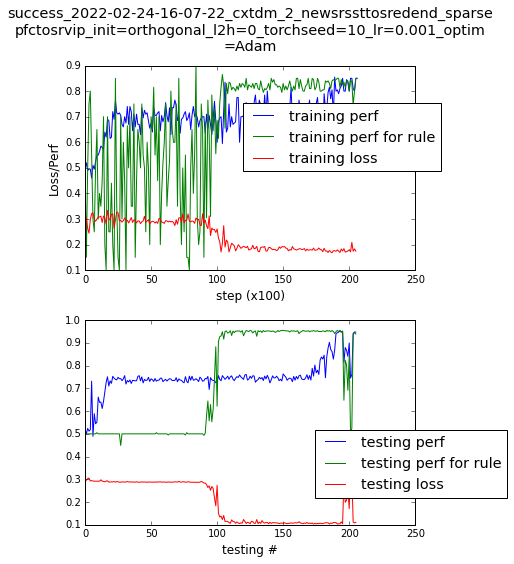

success_2022-02-24-16-07-22_cxtdm_2_newsrssttosredend_sparsepfctosrvip_init=orthogonal_l2h=0_torchseed=10_lr=0.001_optim=Adam
structured_sr_sst_to_sr_edend=False
divisive_dend_ei=False
divisive_dend_inh=True
dend_nonlinearity=old
activation=relu_satu
structured_sr_sst_to_sr_edend_branch_specific=True
sparse_pfcesoma_to_srvip=1


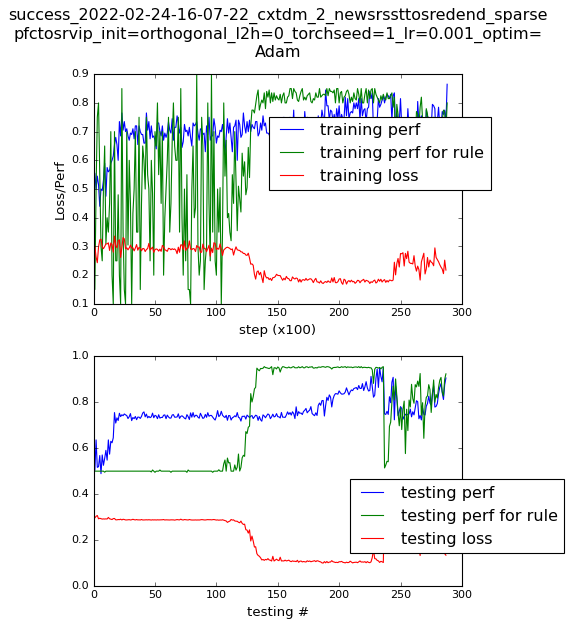

success_2022-02-24-16-07-22_cxtdm_2_newsrssttosredend_sparsepfctosrvip_init=orthogonal_l2h=0_torchseed=1_lr=0.001_optim=Adam
structured_sr_sst_to_sr_edend=False
divisive_dend_ei=False
divisive_dend_inh=True
dend_nonlinearity=old
activation=relu_satu
structured_sr_sst_to_sr_edend_branch_specific=True
sparse_pfcesoma_to_srvip=1


In [209]:
for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if '2022-02-24-16-07-22' in model_name:
        if 'gradExplode' in model_name or 'noConverge' in model_name:
            continue
        path_to_file = '/scratch/yl4317/two_module_rnn/saved_models/'+model_name
        model, hp_test, hp_task_test, optim, saved_data = load_model_v2(path_to_file=path_to_file, model_name=model_name, simple=False, plot=True, toprint=False)
#         if hp_test['activation']=='relu':
#             continue  
#         if hp_test['activation']!='relu_satu':
#             continue
            
        print(model_name)
 
        for key in ['structured_sr_sst_to_sr_edend', 'divisive_dend_ei', 'divisive_dend_inh', 'dend_nonlinearity', 'activation', 'structured_sr_sst_to_sr_edend_branch_specific',
                   'sparse_pfcesoma_to_srvip']:
            print('{}={}'.format(key, hp_test[key]))
#         model, hp_test, hp_task_test, optim, saved_data = load_model_v2(path_to_file=path_to_file, model_name=model_name, simple=False, plot=True, toprint=False)


In [62]:
test = []
for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if '2022-02-14-16-54-57' in model_name:
        model, hp_test, hp_task_test, optim, saved_data = load_model_v2(path_to_file=path_to_file, model_name=model_name, simple=False, plot=False, toprint=False)
        if hp_test['dend_nonlinearity']=='step' and hp_test['activation']!='relu_satu':
            continue 
            test.append(model_name)
print(len(test))

KeyboardInterrupt: 